In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RANDOM_SEED = 42

In [3]:
bitrate_train = pd.read_csv('data/bitrate_prediction/bitrate_train.csv')
stream_quality_train = pd.read_csv('data/stream_quality_data/train_data.csv')

In [4]:
bitrate_train

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0
...,...,...,...,...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633,3325.0
379017,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234,3293.0
379018,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892,3317.0
379019,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319,3283.0


In [8]:
bitrate_profile = ProfileReport(bitrate_train, title="bitrate data")
bitrate_profile.to_file('bitrate_profile.html')

Summarize dataset:  62%|██████▏   | 13/21 [00:00<00:00, 30.43it/s, Calculate kendall correlation]       /opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 238.16it/s]


In [9]:
stream_quality_profile = ProfileReport(stream_quality_train, title="stream quality data")
stream_quality_profile.to_file('stream_quality_profile.html')

Summarize dataset:  65%|██████▌   | 15/23 [00:02<00:00,  8.36it/s, Calculate kendall correlation]       /opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 282.65it/s]


## Regression

In [5]:
bitrate_train

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0
...,...,...,...,...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633,3325.0
379017,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234,3293.0
379018,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892,3317.0
379019,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319,3283.0


In [6]:
bitrate_train.describe()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
count,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000,379021.000000
mean,35.231127,1.725705,49.623858,12.763672,0.180451,0.469548,1.450719,7516.585502,1603.487501,7525.396231
std,10.975010,2.505942,94.781098,112.684460,1.732890,3.157866,9.670928,6073.992189,1721.021623,6070.817736
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.800000,0.316228,14.300000,0.699206,0.000000,0.000000,0.000000,2773.300000,383.683550,2785.000000
50%,30.000000,0.942809,32.200000,1.433721,0.000000,0.000000,0.000000,6287.200000,1112.710010,6296.000000
75%,43.600000,2.233582,55.900000,4.948625,0.000000,0.000000,0.000000,10187.200000,2241.848801,10192.000000
max,125.800000,307.167273,12898.400000,40721.933293,540.000000,202.385770,640.000000,64913.500000,26908.532303,64913.000000


## Empty values

In [7]:
bitrate_train.isna().sum()

fps_mean               0
fps_std                0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
bitrate_mean           0
bitrate_std            0
target                 0
dtype: int64

There is 0 nan values exist.

## Data distribution
Also in this section I will remove outliers   

<AxesSubplot:>

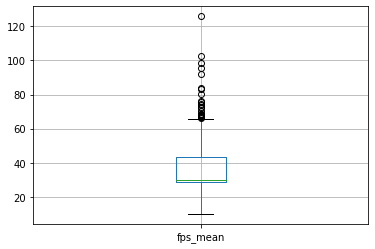

In [8]:
bitrate_train.boxplot(column='fps_mean')

In [9]:
bitrate_train = bitrate_train[bitrate_train['fps_mean'] < 65]
bitrate_train.shape

(378990, 10)

<AxesSubplot:>

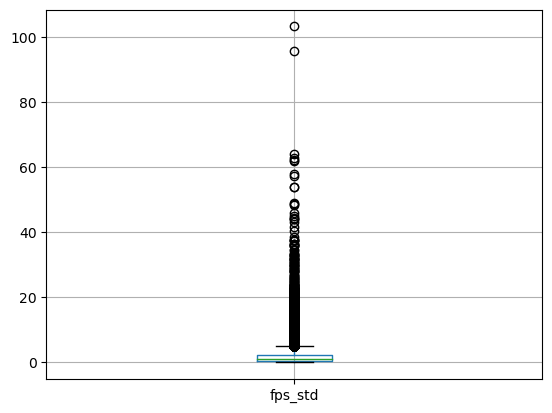

In [10]:
bitrate_train.boxplot(column='fps_std')

In [11]:
bitrate_train = bitrate_train[bitrate_train['fps_std'] < 40.0]
bitrate_train.shape

(378969, 10)

<AxesSubplot:>

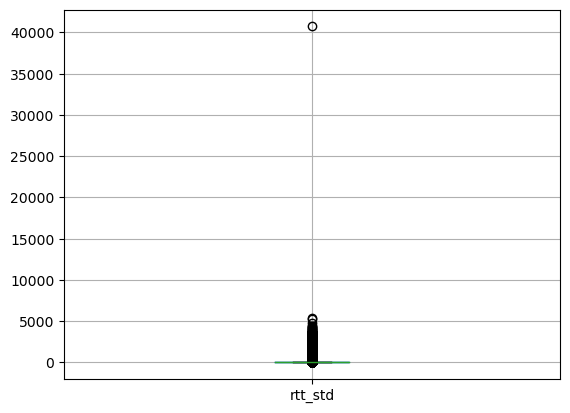

In [12]:
bitrate_train.boxplot(column='rtt_std')

In [13]:
bitrate_train = bitrate_train[bitrate_train['rtt_std'] < 500]
bitrate_train.shape

(377525, 10)

<AxesSubplot:>

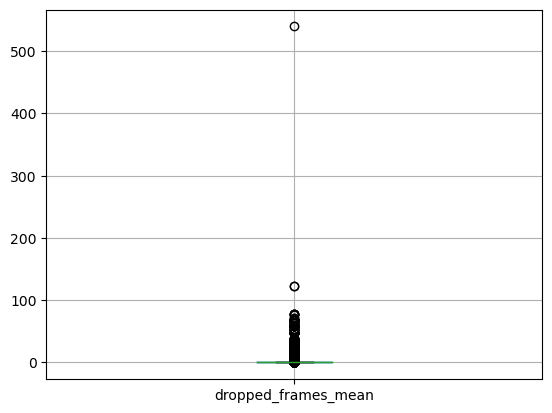

In [14]:
bitrate_train.boxplot(column='dropped_frames_mean')

In [15]:
bitrate_train = bitrate_train[bitrate_train['dropped_frames_mean'] < 100]
bitrate_train.shape

(377522, 10)

<AxesSubplot:>

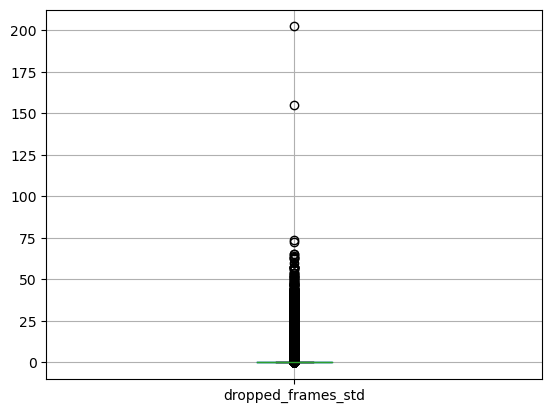

In [16]:
bitrate_train.boxplot(column='dropped_frames_std')

In [17]:
bitrate_train = bitrate_train[bitrate_train['dropped_frames_std'] < 75]
bitrate_train.shape

(377520, 10)

<AxesSubplot:>

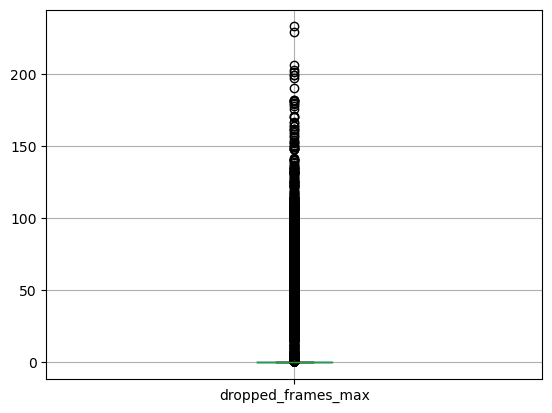

In [18]:
bitrate_train.boxplot(column='dropped_frames_max')

In [19]:
bitrate_train = bitrate_train[bitrate_train['dropped_frames_max'] < 75]
bitrate_train.shape

(376327, 10)

<AxesSubplot:>

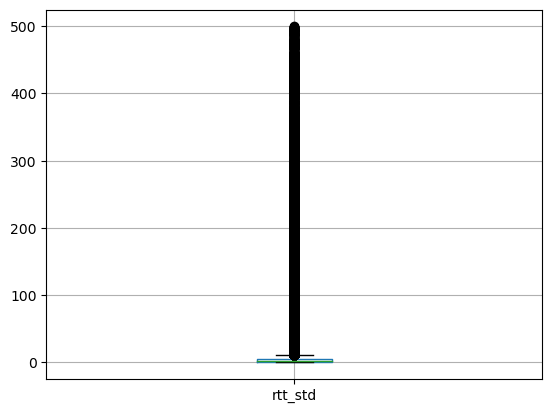

In [20]:
bitrate_train.boxplot(column='rtt_std')

In [21]:
bitrate_train = bitrate_train[bitrate_train['rtt_std'] < 300]
bitrate_train.shape

(375470, 10)

<AxesSubplot:>

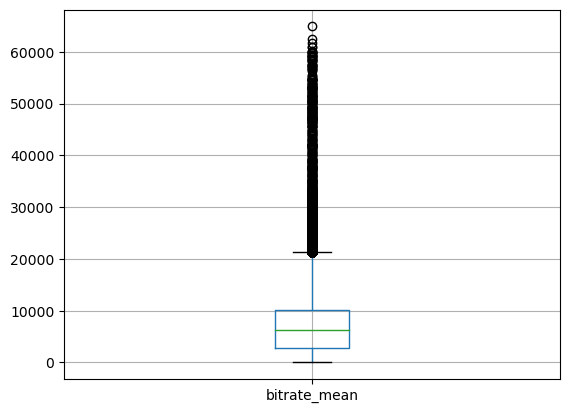

In [22]:
bitrate_train.boxplot(column='bitrate_mean')

In [23]:
bitrate_train = bitrate_train[bitrate_train['bitrate_mean'] < 30000]
bitrate_train.shape

(374628, 10)

<AxesSubplot:>

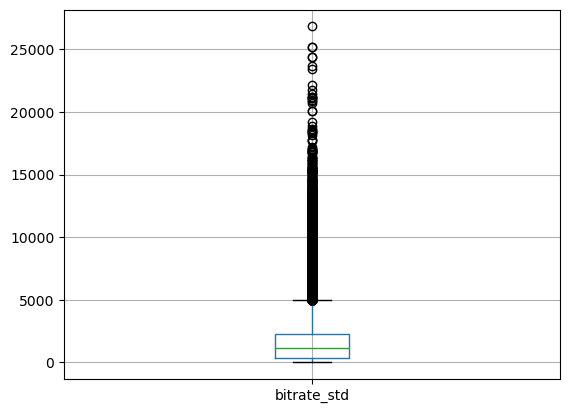

In [24]:
bitrate_train.boxplot(column='bitrate_std')

In [25]:
bitrate_train = bitrate_train[bitrate_train['bitrate_std'] < 10000]
bitrate_train.shape

(373656, 10)

## Feature selection

In [26]:
def select_features(X_train, y_train):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	return fs

In [27]:
X_reg = bitrate_train[
    [
        "fps_mean",
        "fps_std",
        "rtt_mean",
        "rtt_std",
        "dropped_frames_mean",
        "dropped_frames_std",
        "dropped_frames_max",
        "bitrate_mean",
        "bitrate_std",
    ]
]
y_reg = bitrate_train[["target"]]

Feature 0: 14878.903591
Feature 1: 2252.217617
Feature 2: 9625.186227
Feature 3: 2449.224703
Feature 4: 783.952356
Feature 5: 1200.114948
Feature 6: 1258.057966
Feature 7: 3201804.694086
Feature 8: 132931.940100


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


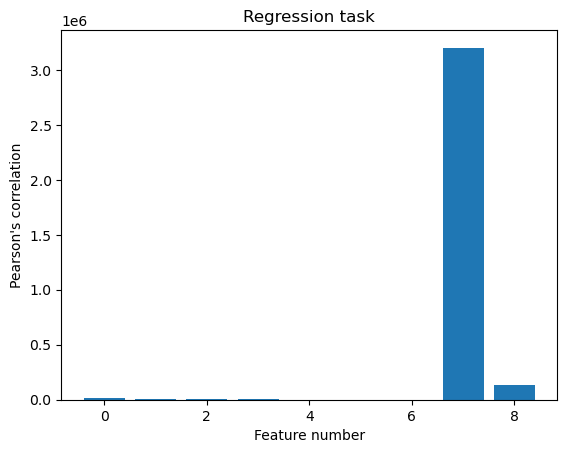

In [60]:
fs = select_features(X_reg, y_reg)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.title('Regression task')
plt.xlabel('Feature number')
plt.ylabel("Pearson's correlation")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Classification data

In [30]:
stream_quality_train

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,off,partial,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,off,partial,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,off,partial,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,off,partial,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406567,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406568,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406569,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406570,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0


In [31]:
stream_quality_train.describe()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_fec_mean,stream_quality
count,406572.000000,406572.000000,406572.000000,406572.000000,406572.000000,4.065720e+05,4.065720e+05,4.065720e+05,406572.000000,406572.000000
mean,34.497561,2.285486,0.183151,54.314400,19.525019,1.730432e+06,1.378279e+05,1.893339e+06,51.413536,0.068460
std,11.625494,3.708531,1.099384,133.872062,156.364337,4.930091e+07,9.229776e+06,5.241003e+07,34.836045,0.252534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,28.300000,0.316228,0.000000,14.100000,0.699206,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
50%,30.000000,0.994429,0.000000,32.300000,1.490712,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
75%,43.000000,2.590581,0.000000,57.100000,5.334375,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
max,127.100000,312.540842,10.000000,12898.400000,40721.933293,2.097289e+09,9.963751e+08,2.097289e+09,250.000000,1.000000


There is no Nan values

In [32]:
stream_quality_train.isna().sum()

fps_mean               0
fps_std                0
fps_lags               0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
auto_bitrate_state     0
auto_fec_state         0
auto_fec_mean          0
stream_quality         0
dtype: int64

<AxesSubplot:>

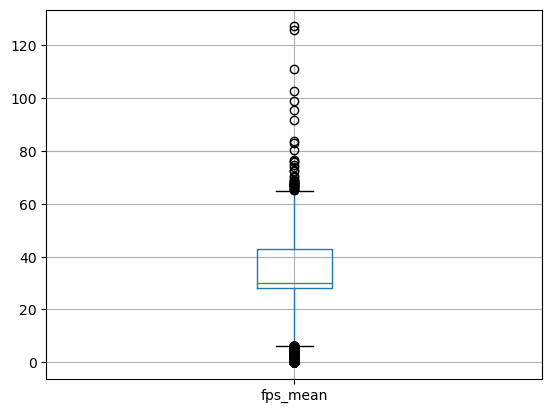

In [33]:
stream_quality_train.boxplot(column='fps_mean')

In [34]:
stream_quality_train = stream_quality_train[stream_quality_train['fps_mean'] < 80]
stream_quality_train.shape

(406562, 12)

<AxesSubplot:>

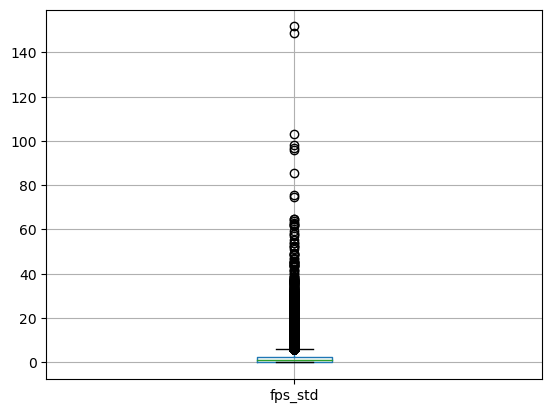

In [35]:
stream_quality_train.boxplot(column='fps_std')

In [36]:
stream_quality_train = stream_quality_train[stream_quality_train['fps_std'] < 60]
stream_quality_train.shape

(406545, 12)

<AxesSubplot:>

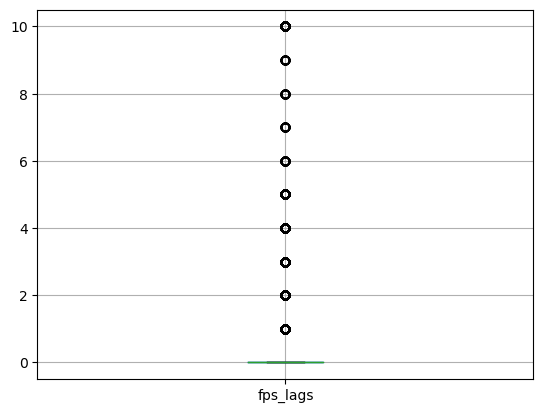

In [37]:
stream_quality_train.boxplot(column='fps_lags')

<AxesSubplot:>

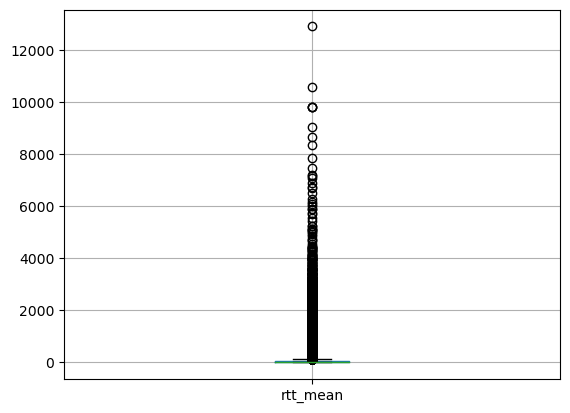

In [38]:
stream_quality_train.boxplot(column='rtt_mean')

In [39]:
stream_quality_train = stream_quality_train[stream_quality_train['rtt_mean'] < 8000]
stream_quality_train.shape

(406537, 12)

<AxesSubplot:>

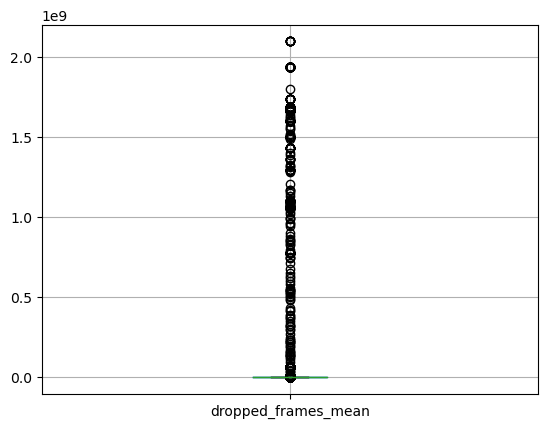

In [40]:
stream_quality_train.boxplot(column='dropped_frames_mean')

In [41]:
stream_quality_train['auto_bitrate_state'].value_counts()

off        330172
full        75955
partial       410
Name: auto_bitrate_state, dtype: int64

In [42]:
bitrate_state_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
transformed = bitrate_state_encoder.fit_transform(stream_quality_train['auto_bitrate_state'].to_numpy().reshape(-1, 1))
bitrate_state_df = pd.DataFrame(transformed, columns=[f'bitrate_{category}' for category in bitrate_state_encoder.categories_[0]])
bitrate_state_df

,bitrate_full,bitrate_off,bitrate_partial
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
406532,1.0,0.0,0.0
406533,1.0,0.0,0.0
406534,1.0,0.0,0.0
406535,1.0,0.0,0.0


In [43]:
stream_quality_train['auto_fec_state'].value_counts()

partial    359271
off         47266
Name: auto_fec_state, dtype: int64

In [44]:
fec_state_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
transformed = fec_state_encoder.fit_transform(stream_quality_train['auto_fec_state'].to_numpy().reshape(-1, 1))
fec_state_df = pd.DataFrame(transformed, columns=[f'fec_{category}' for category in fec_state_encoder.categories_[0]])
fec_state_df

,fec_off,fec_partial
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
406532,0.0,1.0
406533,0.0,1.0
406534,0.0,1.0
406535,0.0,1.0


In [46]:
y_true = stream_quality_train[['stream_quality']]
stream_quality_train = stream_quality_train[['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std', 'dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max', 'auto_fec_mean']]
# stream_quality_train = pd.concat([stream_quality_train, fec_state_df, bitrate_state_df], axis=1, ignore_index=True)

In [47]:
stream_quality_train.reset_index(inplace=True)
stream_quality_train.drop(['index'], axis=1, inplace=True, errors='ignore')
fec_state_df.reset_index(inplace=True)
fec_state_df.drop(['index'], axis=1, inplace=True, errors='ignore')
bitrate_state_df.reset_index(inplace=True)
bitrate_state_df.drop(['index'], axis=1, inplace=True, errors='ignore')

/var/folders/_0/jg31z24j4s78_r7b93bhvd400000gn/T/ipykernel_16033/591852642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stream_quality_train.drop(['index'], axis=1, inplace=True, errors='ignore')


In [48]:
stream_quality_train = pd.concat([stream_quality_train, 
                                    fec_state_df, 
                                    bitrate_state_df], axis=1)

In [49]:
stream_quality_train

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_fec_mean,fec_off,fec_partial,bitrate_full,bitrate_off,bitrate_partial
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,50.0,0.0,1.0,0.0,1.0,0.0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,50.0,0.0,1.0,0.0,1.0,0.0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,50.0,0.0,1.0,0.0,1.0,0.0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,50.0,0.0,1.0,0.0,1.0,0.0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,50.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406532,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,0.0
406533,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,0.0
406534,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,0.0
406535,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,0.0


## Feature importance

Feature 0: 13531.191823
Feature 1: 18820.279826
Feature 2: 110354.969776
Feature 3: 3630.958985
Feature 4: 5332.853372
Feature 5: 6934.340965
Feature 6: 1237.846936
Feature 7: 7353.127960
Feature 8: 400.377869
Feature 9: 1620.573042
Feature 10: 1620.573042
Feature 11: 86.602618
Feature 12: 102.274850
Feature 13: 103.343364


/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


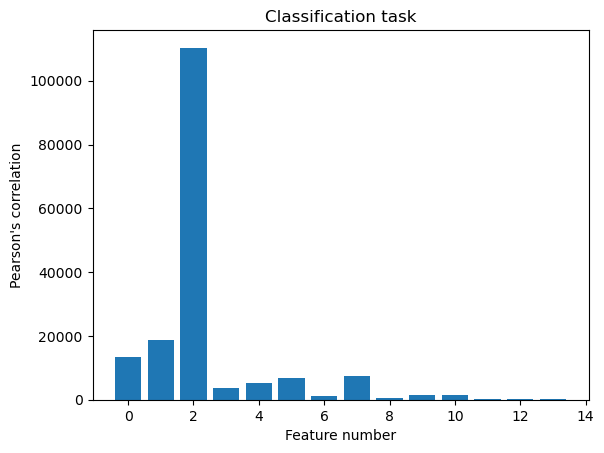

In [57]:
fs = select_features(stream_quality_train, y_true)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.title('Classification task')
plt.xlabel('Feature number')
plt.ylabel("Pearson's correlation")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Imbalance of target

In [46]:
stream_quality_train['stream_quality'].value_counts()

0    378738
1     27834
Name: stream_quality, dtype: int64